# Problem Statement

The given data has sales of item across stores for each day, from the data the learning is to be done for prediction of sales of each item for next 3 months.

Note: it has to be item level and for 90 day period

### Data Review and Consolidation

In [ ]:
# Importing Important Packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_2.csv")

In [3]:
df1 = df.drop('store',axis = 1)

In [4]:
df1.dtypes

date     object
item      int64
sales     int64
dtype: object

In [5]:
df1['date'] = pd.to_datetime(df.date)

In [6]:
df1.isnull().sum()
df1[df1['sales'] < 1]
df1['sales'].unique()
df1['item'].unique()
#df1.drop(df[df.sales == 0].index, inplace = True)
df1.drop_duplicates(inplace = True)
df1.shape
df1.isnull().sum()

date     0
item     0
sales    0
dtype: int64

### Data Extraction for 90 day period

In [7]:
# To get number of days in a month
import calendar

def days_in_month(year, month):
    return calendar.monthrange(year, month)[1]

In [8]:
# Finding data period
df1['date'].dt.to_period('Y').unique()

<PeriodArray>
['2013', '2014', '2015', '2016', '2017']
Length: 5, dtype: period[A-DEC]

In [9]:
# Creation of date intervals for data generation
s_date = []
e_date = []

for y in [2013,2014,2015,2016,2017]:
    for j in [1,2,3,4,5,6,7,8,9]:
        for i,h in zip(range(1,(days_in_month(y,j))+1),range(1,(days_in_month(y,j+3))+1)):
            s_date.append(f'{y}-{j}-{i}')
            e_date.append(f'{y}-{j+3}-{h}')
            
#len(s_date), s_date[0], e_date[0], s_date[1350], e_date[1350]

In [10]:
# Creating an aggregate dataset based on the 

for i in range(len(s_date)):
    start_date = s_date[i]
    end_date = e_date[i]
    df2 = df1[(df1['date'] >= start_date) & (df1['date'] <= end_date)]
    df3 = df2.groupby([pd.Grouper(key ='date', freq ='y'),'item']).sum()
    df3.reset_index(inplace=True)
    if i == 0:
        df_ml = pd.DataFrame({'start_date':start_date,'end_date':end_date,'item':df3.item,'sales':df3.sales})
    else:
        df_ml1 = pd.DataFrame({'start_date':start_date,'end_date':end_date,'item':df3.item,'sales':df3.sales})
        df_ml = pd.concat([df_ml,df_ml1])

### Sanity Check of Extracted Data

In [11]:
df_ml.shape
df_ml.isnull().sum()
df_ml
#2013-1-1	2013-4-1	1	10275

print('Check Sum of item 1:',df1[(df1['date'] >= '2013-03-01') & (df1['date'] <= '2013-06-01') & (df1['item'] == 1)]['sales'].sum())
df_ml

Check Sum of item 1: 14319


,start_date,end_date,item,sales
0,2013-1-1,2013-4-1,1,10275
1,2013-1-1,2013-4-1,2,31438
2,2013-1-1,2013-4-1,3,18230
3,2013-1-1,2013-4-1,4,10249
4,2013-1-1,2013-4-1,5,8140
...,...,...,...,...
45,2017-9-30,2017-12-30,46,52811
46,2017-9-30,2017-12-30,47,17605
47,2017-9-30,2017-12-30,48,45903
48,2017-9-30,2017-12-30,49,24193


In [12]:
# data type check and conversion to right data type
df_ml.columns
df_ml.dtypes
df_ml['start_date'] = pd.to_datetime(df_ml.start_date) # Object to datetime conversion
df_ml['end_date'] = pd.to_datetime(df_ml.end_date) # Object to datetime conversion
df_ml.dtypes

start_date    datetime64[ns]
end_date      datetime64[ns]
item                   int64
sales                  int64
dtype: object

In [13]:
df_ml.describe()
#df_ml.shape

,item,sales
count,67550.000000,67550.000000
mean,25.500000,47419.290999
std,14.430977,22280.784084
min,1.000000,8140.000000
25%,13.000000,27493.750000
50%,25.500000,45935.500000
75%,38.000000,64603.750000
max,50.000000,108042.000000


In [14]:
df_ml.drop_duplicates(inplace = True)

### Feature Extraction

In [15]:
df_ml['year']=df_ml['start_date'].dt.year
df_ml['month']=df_ml['start_date'].dt.month
df_ml['day']=df_ml['start_date'].dt.day
df_ml['d_of_week']=df_ml['start_date'].dt.day_of_week
df_ml['d_of_year']=df_ml['start_date'].dt.day_of_year
df_ml['days_in_month']=df_ml['start_date'].dt.days_in_month
df_ml['quarter']=df_ml['start_date'].dt.quarter
df_ml['is_qtr_start']=df_ml['start_date'].dt.is_quarter_start
df_ml['is_qtr_end']=df_ml['start_date'].dt.is_quarter_end
df_ml['isleapyear']=df_ml['start_date'].dt.is_leap_year
df_ml['is_m_start']=df_ml['start_date'].dt.is_month_start
df_ml['is_m_end']=df_ml['start_date'].dt.is_month_end
df_ml['is_y_start']=df_ml['start_date'].dt.is_year_start
df_ml['is_y_end']=df_ml['start_date'].dt.is_year_end

In [16]:
# Converting boolean to int
df_ml['is_qtr_start'] = df_ml['is_qtr_start'].astype(int)
df_ml['is_qtr_end'] = df_ml['is_qtr_end'].astype(int)
df_ml['isleapyear'] = df_ml['isleapyear'].astype(int)
df_ml['is_m_start'] = df_ml['is_m_start'].astype(int)
df_ml['is_m_end'] = df_ml['is_m_end'].astype(int)
df_ml['is_y_start'] = df_ml['is_y_start'].astype(int)
df_ml['is_y_end'] = df_ml['is_y_end'].astype(int)

In [17]:
df_ml.dtypes
#df_ml.shape

start_date       datetime64[ns]
end_date         datetime64[ns]
item                      int64
sales                     int64
year                      int64
month                     int64
day                       int64
d_of_week                 int64
d_of_year                 int64
days_in_month             int64
quarter                   int64
is_qtr_start              int32
is_qtr_end                int32
isleapyear                int32
is_m_start                int32
is_m_end                  int32
is_y_start                int32
is_y_end                  int32
dtype: object

In [150]:
print(df_ml.columns)
X_features = ['year', 'month', 'day',
       'd_of_week', 'd_of_year', 'days_in_month','quarter','is_qtr_start',
       'is_qtr_end', 'isleapyear', 'is_m_start', 'is_m_end', 'is_y_start',
       'is_y_end']
y_feature = ['sales']

Index(['start_date', 'end_date', 'item', 'sales', 'year', 'month', 'day',
       'd_of_week', 'd_of_year', 'days_in_month', 'quarter', 'is_qtr_start',
       'is_qtr_end', 'isleapyear', 'is_m_start', 'is_m_end', 'is_y_start',
       'is_y_end'],
      dtype='object')


In [314]:
df_ml.iloc[:,3:]

,sales,year,month,day,d_of_week,d_of_year,days_in_month,quarter,is_qtr_start,is_qtr_end,isleapyear,is_m_start,is_m_end,is_y_start,is_y_end
0,10275,2013,1,1,1,1,31,1,1,0,0,1,0,1,0
1,31438,2013,1,1,1,1,31,1,1,0,0,1,0,1,0
2,18230,2013,1,1,1,1,31,1,1,0,0,1,0,1,0
3,10249,2013,1,1,1,1,31,1,1,0,0,1,0,1,0
4,8140,2013,1,1,1,1,31,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,52811,2017,9,30,5,273,30,3,0,1,0,0,1,0,0
46,17605,2017,9,30,5,273,30,3,0,1,0,0,1,0,0
47,45903,2017,9,30,5,273,30,3,0,1,0,0,1,0,0
48,24193,2017,9,30,5,273,30,3,0,1,0,0,1,0,0


## EDA

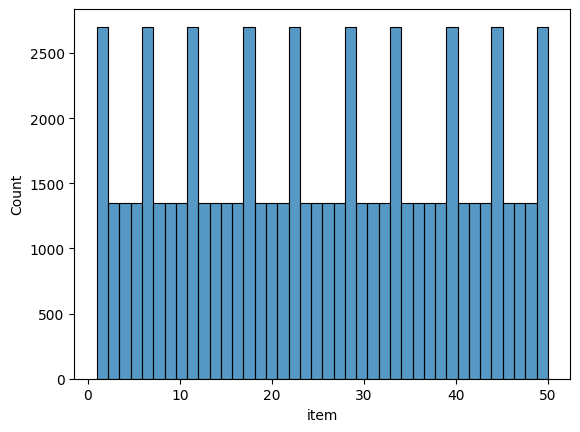

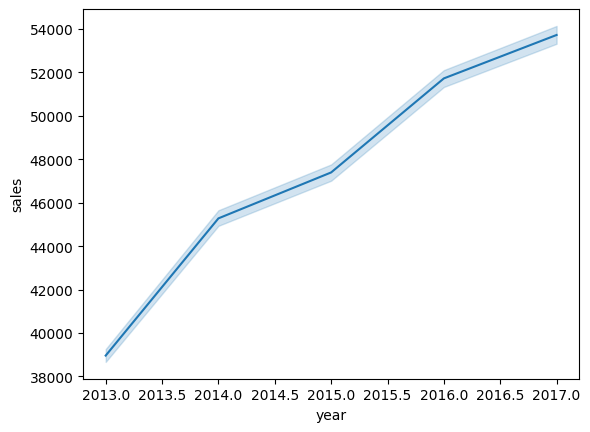

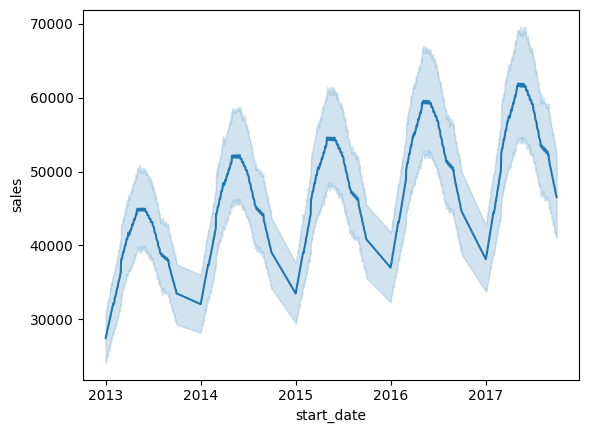

In [311]:
# Visualize the distribution of sales data
sns.histplot(df_ml['item'])
plt.show()

# Visualize the relationship between sales and other variables
sns.lineplot(x='year', y='sales', data=df_ml)
plt.show()

# Visualize the relationship between sales and other variables
sns.lineplot(x='start_date', y='sales', data=df_ml)
plt.show()

In [326]:
df_ml.corr() # no linear relationship

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\3383299691.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ml.corr()


,item,sales,year,month,day,d_of_week,d_of_year,days_in_month,quarter,is_qtr_start,is_qtr_end,isleapyear,is_m_start,is_m_end,is_y_start,is_y_end
item,1.000000e+00,-0.070302,5.735073e-15,-5.969380e-16,5.650661e-18,4.883202e-18,-5.669985e-16,-2.649521e-16,-5.802525e-16,3.923249e-18,8.503805e-19,3.026007e-15,1.006955e-17,-2.735526e-17,5.674557e-17,NaN
sales,-7.030163e-02,1.000000,2.282475e-01,8.623306e-02,1.363026e-02,3.532271e-03,8.585636e-02,5.207042e-02,7.744338e-02,-9.774743e-03,-3.469689e-03,9.676350e-02,-3.540210e-03,9.735723e-03,-3.775047e-02,NaN
year,5.735073e-15,0.228248,1.000000e+00,-6.161492e-04,8.130282e-04,3.143572e-03,8.958943e-04,1.583451e-02,-6.495255e-04,-5.546928e-05,-4.520596e-05,3.540109e-01,-9.717281e-05,-7.888952e-05,-3.190602e-05,NaN
month,-5.969380e-16,0.086233,-6.161492e-04,1.000000e+00,1.769728e-02,-1.859919e-03,9.938873e-01,1.978334e-01,9.480253e-01,-4.232377e-02,8.301366e-02,-1.740481e-03,-1.976464e-03,2.768998e-02,-9.543192e-02,NaN
day,5.650661e-18,0.013630,8.130282e-04,1.769728e-02,1.000000e+00,-2.319924e-04,1.275421e-01,3.709131e-02,2.133514e-02,-1.772894e-01,1.440663e-01,2.296619e-03,-3.105811e-01,2.519907e-01,-1.019771e-01,NaN
d_of_week,4.883202e-18,0.003532,3.143572e-03,-1.859919e-03,-2.319924e-04,1.000000e+00,-1.924881e-03,3.839532e-03,-2.259782e-03,-1.755376e-02,-1.718619e-02,-3.682834e-04,-3.921429e-03,-2.345846e-03,6.166512e-03,NaN
d_of_year,-5.669985e-16,0.085856,8.958943e-04,9.938873e-01,1.275421e-01,-1.924881e-03,1.000000e+00,1.948183e-01,9.426999e-01,-6.165539e-02,9.864302e-02,2.530697e-03,-3.617180e-02,5.537253e-02,-1.055042e-01,NaN
days_in_month,-2.649521e-16,0.052070,1.583451e-02,1.978334e-01,3.709131e-02,3.839532e-03,1.948183e-01,1.000000e+00,2.610042e-01,3.507722e-02,-3.681694e-02,4.472888e-02,-4.159062e-03,-5.854286e-02,4.325726e-02,NaN
quarter,-5.802525e-16,0.077443,-6.495255e-04,9.480253e-01,2.133514e-02,-2.259782e-03,9.426999e-01,2.610042e-01,1.000000e+00,-1.348416e-03,5.192410e-02,-1.834761e-03,-2.362197e-03,2.892598e-02,-7.562208e-02,NaN
is_qtr_start,3.923249e-18,-0.009775,-5.546928e-05,-4.232377e-02,-1.772894e-01,-1.755376e-02,-6.165539e-02,3.507722e-02,-1.348416e-03,1.000000e+00,-9.150146e-03,-1.566880e-04,5.708312e-01,-1.596804e-02,5.752016e-01,NaN


### Observation

- It is evident from the above EDA that the data has a cyclic patter in an increasing fashion
- From the heat map we can learn that there isnt any correlation between the features, ruling out the linear regression.
- Henceforth will be implementing other regression learning such as KNN, Decision Tree, Random Forest and XGBoost

### ML Implementation

### Approach:

- We will implement the models and learn the best hyperparameters for each of them and store them for each item.
- It is done item wise since each item fits with a different hyperparameter.
- The learned hyperparameter is implemented and the test and train scores are captured for each item

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Learning the HyperParameter for each item in the data

#### KNN Model

In [70]:
bvk, tm,m_test_rmse = [],[],[]
for itm in range(1,51):
    # filter the dataset for the current item
    df_ml_itm = df_ml[df_ml['item'] == itm]

    # split the dataset into train and test sets
    train_size = int(len(df_ml_itm) * 0.8)
    train_data, test_data = df_ml_itm[:train_size], df_ml_itm[train_size:]
    train_data.reset_index(drop=True, inplace=True)


    # initialize the scaler and transform the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_data[X_features])
    X_test_scaled = scaler.transform(test_data[X_features])

    # initialize the time series split
    tscv = TimeSeriesSplit(n_splits=3)

    # initialize the lists to store the results
    k_values = []
    train_mse_scores = []
    train_r2_scores = []
    test_rmse_scores = []
    test_r2_scores = []

    # loop through each fold of the time series split
    for train_index, test_index in tscv.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = train_data['sales'][train_index], train_data['sales'][test_index]

        # loop through each value of k
        for k in range(1, 14):
            knn = KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train_fold, y_train_fold)

            # evaluate the model on the training set
            y_pred_train_fold = knn.predict(X_test_fold)
            train_mse = mean_squared_error(y_test_fold, y_pred_train_fold)
            train_r2 = r2_score(y_test_fold, y_pred_train_fold)

            # evaluate the model on the test set
            y_pred_test = knn.predict(X_test_scaled)
            test_rmse = np.sqrt(mean_squared_error(test_data['sales'], y_pred_test))
            test_r2 = r2_score(test_data['sales'], y_pred_test)

            # append the results to the lists
            k_values.append(k)
            train_mse_scores.append(train_mse)
            train_r2_scores.append(train_r2)
            test_rmse_scores.append(test_rmse)
            test_r2_scores.append(test_r2)

    # find the best k value based on the mean test RMSE scores
    mean_test_rmse_scores = []
    for k in range(1, 14):
        k_test_rmse_scores = [test_rmse_scores[i] for i in range(len(test_rmse_scores)) if k_values[i] == k]
        mean_test_rmse = np.mean(k_test_rmse_scores)
        mean_test_rmse_scores.append(mean_test_rmse)
        best_k = mean_test_rmse_scores.index(min(mean_test_rmse_scores)) + 1
    bvk.append(best_k)
    tm.append(itm)
    m_test_rmse.append(min(mean_test_rmse_scores))
knn_model = pd.DataFrame({'Item':tm, 'K_value':bvk})

In [246]:
knn_model.head()

,Item,K_value
0,1,3
1,2,1
2,3,3
3,4,3
4,5,3


### Decision Tree

In [237]:
results = pd.DataFrame(columns=['item_id', 'max_depth', 'rmse'])
dtr_model = pd.DataFrame(columns=['item_id', 'best_max_depth'])
for itm in range(1,51):
    df_ml_itm = df_ml[df_ml['item'] == itm]
    X = df_ml_itm[dtr_features]
    y = df_ml_itm['sales']
    
    best_rmse = np.inf
    best_max_depth = None
    
    for max_depth in range(1,12):
    
        # Initialize an empty list to store the RMSEs for each fold
        rmses = []
        
        tscv = TimeSeriesSplit(n_splits=5)

        # Split the data into training and testing sets using time series cross-validation
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Scale the data
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train.values)
            X_test = scaler.transform(X_test.values)

            # Fit a decision tree and store the RMSE
            dtr = DecisionTreeRegressor(max_depth=max_depth)
            dtr.fit(X_train, y_train)
            y_pred = dtr.predict(X_test)
            rmse = np.sqrt(((y_pred - y_test) ** 2).mean())
            rmses.append(rmse)

        # Calculate the mean RMSE across all folds and store the results in the dataframe
        mean_rmse = np.mean(rmses)
        results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
        
        # Update the best max_depth if necessary
        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_max_depth = max_depth

    # Store the best max_depth for this item in the best_max_depths dataframe
    dtr_model = dtr_model.append({'item_id': itm, 'best_max_depth': best_max_depth}, ignore_index=True)

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtr_model = dtr_model.append({'item_id': itm, 'best_max_depth': best_max_depth}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The fr

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtr_model = dtr_model.append({'item_id': itm, 'best_max_depth': best_max_depth}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The fr

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:45: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'item_id': itm, 'max_depth': max_depth, 'rmse': mean_rmse}, ignore_index=True)
C:\Users\pjpra\AppData\Local\Temp\ipykernel_1896\765334396.py:37: FutureWarning: T

In [238]:
dtr_model.head()

,item_id,best_max_depth
0,1,11
1,2,11
2,3,11
3,4,9
4,5,11


In [236]:
importance = dtr.feature_importances_
list(zip(importance,X_features))

dtr_features = ['year','day','d_of_week','d_of_year','days_in_month', 'is_m_end']

### Random Forest

Hyperparameter tuning + Implementation

In [211]:
ittm, max_feature, n_estimators,Test_MSE = [],[],[],[]
rf_model = pd.DataFrame(columns=['item', 'max_feature', 'n_estimator','Test_MSE'])
for itm in range(1,51):
    df_ml_itm = df_ml[df_ml['item'] == itm]
    train_size = int(len(df_ml_itm) * 0.8)
    train, test = df_ml_itm[:train_size], df_ml_itm[train_size:]
    
    # define X and y
    X_train, y_train = train[X_features], train['sales']
    X_test, y_test = test[X_features], test['sales']


    # Define hyperparameters to tune
    param_grid = {
    'n_estimators': [100, 200, 500],
        'max_features':['sqrt']
    }

    # Define time series cross-validation
    tscv = TimeSeriesSplit(n_splits=3)

    # Instantiate random forest regressor
    rf = RandomForestRegressor(random_state=22)

    # Use grid search to find best hyperparameters
    grid_search = GridSearchCV(rf, param_grid, cv=tscv,scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    # RF with best hyperparameters
    rf_best = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'], random_state=42)
    rf_best.fit(X_train, y_train)
    
    test_pred = rf_best.predict(X_test)
    
    mse = mean_squared_error(y_test, test_pred)
    
    # Data Consolidation
    #ittm.append(itm), max_feature.append(best_params['max_features'])
    #n_estimators.append(best_params['n_estimators']) ,Test_MSE.append(mse)
    

    rf_model = rf_model.append({'item':itm,'max_feature':best_params['max_features'],'n_estimator':best_params['n_estimators'],'Test_MSE':mse},ignore_index=True)

In [221]:
rf_model.head()

,item,max_feature,n_estimator,Test_MSE
0,1,sqrt,200,4.140727e+06
1,2,sqrt,200,4.359533e+07
2,3,sqrt,100,1.437267e+07
3,4,sqrt,500,4.341092e+06
4,5,sqrt,200,4.333093e+06


### XGBoost

Hyperparameter tuning + Implementation

In [ ]:
from xgboost import XGBRegressor
# Define the number of splits for TimeSeriesSplit
n_splits = 5

# Initialize TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=n_splits)

# Initialize StandardScaler
scaler = StandardScaler()

# Initialize XGBoost
xgb = XGBRegressor()

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=tss, n_jobs=-1)

# Initialize empty dataframe to store results
xgb_model = pd.DataFrame(columns=['item_id','learning_rate','max_depth','n_estimators','best_score'])

# Loop over each item in the dataframe
for itm in range(1,51):
    df_ml_itm = df_ml[df_ml['item'] == itm]

    # Split the data into features and target
    X = df_ml_itm[X_features]
    y = df_ml_itm['sales']

    # Scale the features
    X_scaled = scaler.fit_transform(X)

    # Run the grid search
    grid_search.fit(X_scaled, y)

    # Extract the best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Add the results to the results dataframe
    xgb_model = xgb_model.append({'item_id': itm, 'learning_rate': best_params['learning_rate'],'max_depth':best_params['max_depth'],'n_estimators':best_params['n_estimators'] , 'best_score': best_score}, ignore_index=True)


In [222]:
xgb_model.head()

,item_id,learning_rate,max_depth,n_estimators,best_score
0,1.0,0.5,5.0,1000.0,0.656841
1,2.0,0.5,3.0,1000.0,0.682437
2,3.0,0.1,3.0,1000.0,0.683587
3,4.0,0.5,5.0,100.0,0.688602
4,5.0,0.5,3.0,500.0,0.625621


## Implementation of best fit hyperparameters

### KNN

In [298]:
itm = []
train_mse_scores = []
train_r2_scores = []
test_rmse_scores = []
test_r2_scores = []
for i in range(1,51):
    df_ml_itm = df_ml[df_ml['item'] == i]

    # split the dataset into train and test sets
    train_size = int(len(df_ml_itm) * 0.8)
    train_data, test_data = df_ml_itm[:train_size], df_ml_itm[train_size:]
    train_data.reset_index(drop=True, inplace=True)


    # initialize the scaler and transform the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_data[X_features])
    X_test_scaled = scaler.transform(test_data[X_features])

    # initialize the time series split
    tscv = TimeSeriesSplit(n_splits=3)

    # loop through each fold of the time series split
    for train_index, test_index in tscv.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = train_data['sales'][train_index], train_data['sales'][test_index]

    knn = KNeighborsRegressor(knn_model.loc[knn_model['Item'] == i, 'K_value'].iloc[0])
    knn.fit(X_train_fold, y_train_fold)

    # evaluate the model on the training set
    y_pred_fold = knn.predict(X_test_fold)
    train_mse = mean_squared_error(y_test_fold, y_pred_fold)
    train_r2 = r2_score(y_test_fold, y_pred_train_fold)

    # evaluate the model on the test set
    y_pred_test = knn.predict(X_test_scaled)
    test_rmse = np.sqrt(mean_squared_error(test_data['sales'], y_pred_test))
    test_r2 = r2_score(test_data['sales'], y_pred_test)

    train_mse_scores.append(train_mse)
    train_r2_scores.append(train_r2)
    test_rmse_scores.append(test_rmse)
    test_r2_scores.append(test_r2)
    itm.append(i)

knn_bfit = pd.DataFrame({'Item':itm, 'train_mse':train_mse_scores,'train_r2':train_r2_scores,'test_rmse':test_rmse_scores,'test_r2':test_r2_scores})

In [299]:
knn_bfit.head()

,Item,train_mse,train_r2,test_rmse,test_r2
0,1,2.771846e+06,-240.550928,2263.367029,0.356240
1,2,1.911986e+07,0.850526,6999.431115,0.182458
2,3,1.184316e+07,-31.252209,4597.922676,-0.084494
3,4,2.738512e+06,-260.722504,2346.747712,0.358564
4,5,3.535603e+06,-524.392317,2583.288155,-0.373744


In [ ]:
for i in range(1,51):
    df_ml_itm = df_ml[df_ml['item'] == i]

    # split the dataset into train and test sets
    train_size = int(len(df_ml_itm) * 0.8)
    train_data, test_data = df_ml_itm[:train_size], df_ml_itm[train_size:]
    train_data.reset_index(drop=True, inplace=True)


    # initialize the scaler and transform the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train_data[X_features])
    X_test_scaled = scaler.transform(test_data[X_features])

    # initialize the time series split
    tscv = TimeSeriesSplit(n_splits=3)

    # loop through each fold of the time series split
    for train_index, test_index in tscv.split(X_train_scaled):
        X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
        y_train_fold, y_test_fold = train_data['sales'][train_index], train_data['sales'][test_index]

    knn = KNeighborsRegressor(knn_model.loc[knn_model['Item'] == i, 'K_value'].iloc[0])
    knn.fit(X_train_fold, y_train_fold)

    # evaluate the model on the training set
    y_pred_fold = knn.predict(X_test_fold)
    train_mse = mean_squared_error(y_test_fold, y_pred_fold)
    train_r2 = r2_score(y_test_fold, y_pred_train_fold)

    # evaluate the model on the test set
    y_pred_test = knn.predict(X_test_scaled)
    test_rmse = np.sqrt(mean_squared_error(test_data['sales'], y_pred_test))
    test_r2 = r2_score(test_data['sales'], y_pred_test)

    train_mse_scores.append(train_mse)
    train_r2_scores.append(train_r2)
    test_rmse_scores.append(test_rmse)
    test_r2_scores.append(test_r2)
    itm.append(i)

### DecisionTree

In [302]:
itm = []
rmses, r2 = [],[]
for i in range(1,51):
    df_ml_itm = df_ml[df_ml['item'] == i]

    X = df_ml_itm[dtr_features]
    y = df_ml_itm['sales']

    # initialize the time series split
    tscv = TimeSeriesSplit(n_splits=3)
    
    for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit a decision tree and store the RMSE
    dtr = DecisionTreeRegressor(max_depth=dtr_model.loc[dtr_model['item_id'] == i, 'best_max_depth'].iloc[0])
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    rmse = np.sqrt(((y_pred - y_test) ** 2).mean())
    r_score = (r2_score(y_pred,y_test))
    
    rmses.append(rmse)
    itm.append(i)
    r2.append(r_score)
    
dtr_bfit = pd.DataFrame({'Item':itm, 'RMSE':rmses,'R2':r2})

In [304]:
dtr_bfit.head()

,Item,RMSE,R2
0,1,1262.826967,0.781575
1,2,4012.852648,0.672913
2,3,2508.813429,0.570752
3,4,1360.963013,0.734503
4,5,1105.260490,0.565451
